In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

##알고리즘 
import xgboost as xgb
from xgboost import XGBClassifier

In [251]:
import matplotlib # 글자 깨짐 방지 폰트설정
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

## 데이터 불러오기

In [252]:
df = pd.read_csv("d:/공모전/IPO/IPO/CleanData/KQ_all.csv")

In [253]:
df.set_index("종목명",inplace = True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 코오롱생명과학 to 제노코
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장유형               741 non-null    object 
 1   공모가                741 non-null    int64  
 2   상장일                741 non-null    object 
 3   상장주식수              741 non-null    int64  
 4   매출총이익률             717 non-null    float64
 5   영업이익률              717 non-null    float64
 6   ROE                723 non-null    float64
 7   유동비율               721 non-null    float64
 8   당좌비율               715 non-null    float64
 9   부채비율               723 non-null    float64
 10  이자보상배율             720 non-null    object 
 11  매출채권회전율            707 non-null    float64
 12  재고자산회전율            608 non-null    float64
 13  매출액증가율             675 non-null    float64
 14  영업이익증가율            686 non-null    float64
 15  IPO_PER            724 non-null    float64
 16  IPO_PBR            723 no

In [255]:
df.columns

Index(['상장유형', '공모가', '상장일', '상장주식수', '매출총이익률', '영업이익률', 'ROE', '유동비율', '당좌비율',
       '부채비율', '이자보상배율', '매출채권회전율', '재고자산회전율', '매출액증가율', '영업이익증가율', 'IPO_PER',
       'IPO_PBR', 'IPO_EV/EBITDA', '1개월 평균 거래량회전율', '1개월 평균 일중변동률',
       '1개월 평균 개인 매도수량 비중', '1개월 평균 개인 매수수량 비중', '1개월 시가총액회전율', '1개월 후PER',
       '1개월 후PBR', '1개월 후EV/EBITDA', '3개월 평균 거래량회전율', '3개월 평균 일중변동률',
       '3개월 평균 개인 매도수량 비중', '3개월 평균 개인 매수수량 비중', '3개월 시가총액회전율', '3개월 후PER',
       '3개월 후PBR', '3개월 후EV/EBITDA', '1개월 시장 회전율', '시장수익률', '광의통화 증감률',
       '고객예탁금 증감률', '3개월 시장 회전율', '시장수익률_3_6', '광의통화 증감률_3_6', '고객예탁금 증감률_3_6',
       '공모가 대비 1개월 수익률', '공모가 대비 3개월 수익률', '공모가 대비 6개월 수익률', '1_3_수익률',
       '3_6_수익률', 'Cat'],
      dtype='object')

In [256]:
df.isnull().sum()

상장유형                   0
공모가                    0
상장일                    0
상장주식수                  0
매출총이익률                24
영업이익률                 24
ROE                   18
유동비율                  20
당좌비율                  26
부채비율                  18
이자보상배율                21
매출채권회전율               34
재고자산회전율              133
매출액증가율                66
영업이익증가율               55
IPO_PER               17
IPO_PBR               18
IPO_EV/EBITDA         19
1개월 평균 거래량회전율          0
1개월 평균 일중변동률           0
1개월 평균 개인 매도수량 비중      0
1개월 평균 개인 매수수량 비중      0
1개월 시가총액회전율            0
1개월 후PER             101
1개월 후PBR             101
1개월 후EV/EBITDA       100
3개월 평균 거래량회전율          0
3개월 평균 일중변동률           0
3개월 평균 개인 매도수량 비중      0
3개월 평균 개인 매수수량 비중      0
3개월 시가총액회전율            0
3개월 후PER             101
3개월 후PBR             101
3개월 후EV/EBITDA       100
1개월 시장 회전율             0
시장수익률                  0
광의통화 증감률               0
고객예탁금 증감률              0
3개월 시장 회전율             0
시장수익률_3_6              0


## 결측치 처리

### 사용하는 컬럼 
       '공모가', '상장주식수', '매출총이익률', '영업이익률', 'ROE', '유동비율', '당좌비율', '부채비율',
      '매출채권회전율', '매출액증가율', '영업이익증가율', 'IPO_PER','IPO_PBR', 'IPO_EV/EBITDA', 
       '1개월 평균 거래량회전율', '1개월 평균 일중변동률',
       '1개월 평균 개인 매도수량 비중', '1개월 평균 개인 매수수량 비중', '1개월 시가총액회전율',
       '1개월 시장 회전율', '시장수익률', '광의통화 증감률',
       '고객예탁금 증감률','Cat
- 재고자산회전율이랑 1개월,3개월 per 등등 : 결측치가 100개 넘어서 임시로 삭제
- 이자보상배율에서 'inf'처리 애매해서 임시 삭제

In [257]:
df = df[['공모가', '상장주식수', '매출총이익률', '영업이익률', 'ROE', '유동비율', '당좌비율', '부채비율',
      '매출채권회전율', '매출액증가율', '영업이익증가율', 'IPO_PER',
       'IPO_PBR', 'IPO_EV/EBITDA', '1개월 평균 거래량회전율', '1개월 평균 일중변동률',
       '1개월 평균 개인 매도수량 비중', '1개월 평균 개인 매수수량 비중', '1개월 시가총액회전율','1개월 시장 회전율', '시장수익률', '광의통화 증감률',
       '고객예탁금 증감률','Cat']]

### 결측치 임시로 삭제
- 743개 -> 666개

In [258]:
df = df.dropna()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 코오롱생명과학 to 제노코
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   공모가                666 non-null    int64  
 1   상장주식수              666 non-null    int64  
 2   매출총이익률             666 non-null    float64
 3   영업이익률              666 non-null    float64
 4   ROE                666 non-null    float64
 5   유동비율               666 non-null    float64
 6   당좌비율               666 non-null    float64
 7   부채비율               666 non-null    float64
 8   매출채권회전율            666 non-null    float64
 9   매출액증가율             666 non-null    float64
 10  영업이익증가율            666 non-null    float64
 11  IPO_PER            666 non-null    float64
 12  IPO_PBR            666 non-null    float64
 13  IPO_EV/EBITDA      666 non-null    float64
 14  1개월 평균 거래량회전율      666 non-null    float64
 15  1개월 평균 일중변동률       666 non-null    float64
 16  1개월 평균 개인 매도수량 비중  666 no

In [260]:
df.describe()

,공모가,상장주식수,매출총이익률,영업이익률,ROE,유동비율,당좌비율,부채비율,매출채권회전율,매출액증가율,...,1개월 평균 거래량회전율,1개월 평균 일중변동률,1개월 평균 개인 매도수량 비중,1개월 평균 개인 매수수량 비중,1개월 시가총액회전율,1개월 시장 회전율,시장수익률,광의통화 증감률,고객예탁금 증감률,Cat
count,666.000000,6.660000e+02,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,...,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,13846.711712,1.042240e+07,0.385481,-0.975604,0.068127,2.963104,2.476835,1.171715,8.753909,1.152620,...,0.132368,8.311906,89.314126,91.934836,326.382831,66.854683,0.081250,0.066859,0.218846,3.852853
std,14191.885318,1.267097e+07,0.248970,12.489706,2.463127,4.362483,4.238364,2.547798,21.318883,12.142019,...,0.137164,3.403420,10.969731,9.551187,345.322859,26.867631,0.210343,0.018040,0.341349,1.124959
min,1000.000000,1.875000e+06,-0.209940,-301.556329,-59.042534,0.171335,0.108116,-35.801389,0.128725,-0.757747,...,0.000833,0.272727,12.384762,36.644545,3.907645,30.071322,-0.441706,0.025827,-0.242243,1.000000
25%,5500.000000,5.000000e+06,0.201402,0.066444,0.127235,1.149266,0.815639,0.403690,3.586434,0.082278,...,0.050833,6.572872,87.053103,90.063532,122.063388,49.362945,-0.059621,0.054800,0.013937,3.000000
50%,10000.000000,6.837500e+06,0.306763,0.118120,0.216952,1.767343,1.306053,0.825135,5.420831,0.272979,...,0.092381,8.311225,93.207708,95.615833,222.888906,56.042200,0.019499,0.066452,0.118885,4.000000
75%,16650.000000,1.051500e+07,0.504231,0.193528,0.324134,3.051807,2.377349,1.562156,8.706852,0.624327,...,0.161310,10.576910,95.871714,97.856390,403.584316,74.405733,0.235475,0.084058,0.300962,5.000000
max,150000.000000,1.366881e+08,1.000000,0.718454,5.246868,61.003046,59.190470,23.542878,480.157970,305.144683,...,1.178571,20.113333,99.064583,99.903636,2912.892445,160.492173,1.110600,0.101129,1.480764,5.000000


In [261]:
X_features = df.drop(['Cat'],axis=1)
y = df['Cat']

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y,\
                                                    test_size=0.2)

## 랜덤포레스트

In [263]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy)) 

랜덤 포레스트 정확도: 0.5000


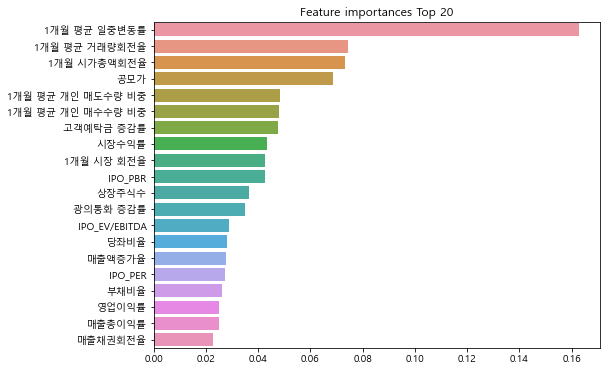

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## XGBoost

In [265]:
from xgboost import XGBClassifier
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

# 모델 학습
xgb_wrapper = XGBClassifier(random_state = 0)
xgb_wrapper.fit(X_train, y_train)

# predict, predict_proba 추출
pred = xgb_wrapper.predict(X_test)
accuracy_xgb = accuracy_score(y_test,pred)
print('xgb 정확도: {0:.4f}'.format(accuracy_xgb))

[17:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb 정확도: 0.4776


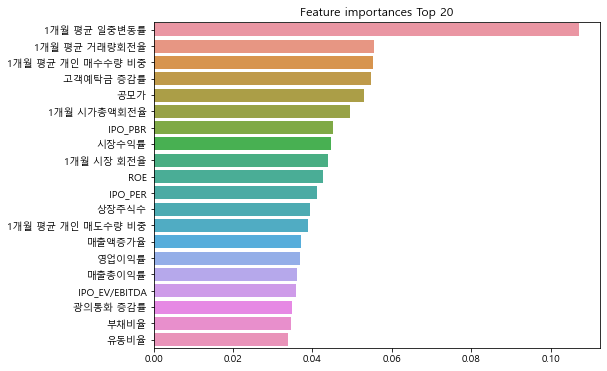

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_wrapper.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LGBM

In [267]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

# LGBM 분류기 객체 생성
lgbm_wrapper = LGBMClassifier(random_state = 0)

# 조기 중단 기능에 필요한 파라미터 정의
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)


# predict, predict_proba 추출
pred = lgbm_wrapper.predict(X_test)
accuracy_xgb = accuracy_score(y_test,pred)
print('lgbm 정확도: {0:.4f}'.format(accuracy_xgb))

[1]	valid_0's multi_logloss: 1.33916
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.30324
[3]	valid_0's multi_logloss: 1.28498
[4]	valid_0's multi_logloss: 1.27043
[5]	valid_0's multi_logloss: 1.25685
[6]	valid_0's multi_logloss: 1.24851
[7]	valid_0's multi_logloss: 1.24337
[8]	valid_0's multi_logloss: 1.24053
[9]	valid_0's multi_logloss: 1.23759
[10]	valid_0's multi_logloss: 1.24455
[11]	valid_0's multi_logloss: 1.25076
[12]	valid_0's multi_logloss: 1.25672
[13]	valid_0's multi_logloss: 1.26704
[14]	valid_0's multi_logloss: 1.27287
[15]	valid_0's multi_logloss: 1.2736
[16]	valid_0's multi_logloss: 1.2805
[17]	valid_0's multi_logloss: 1.27991
[18]	valid_0's multi_logloss: 1.28906
[19]	valid_0's multi_logloss: 1.29313
[20]	valid_0's multi_logloss: 1.30059
[21]	valid_0's multi_logloss: 1.30192
[22]	valid_0's multi_logloss: 1.30492
[23]	valid_0's multi_logloss: 1.31403
[24]	valid_0's multi_logloss: 1.3166
[25]	valid_0's multi_logloss: 1.31751


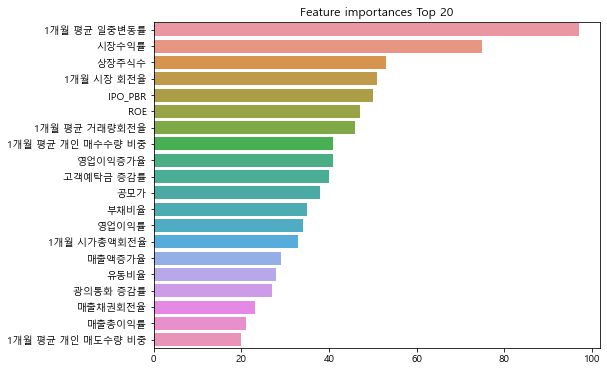

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = lgbm_wrapper.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()